<img src="zayed_codershq.png"/>

This notebook will give you a rundown on introductory linear algebra, teach you some basic quantum gates, and help you get started by writing your own quantum circuits.

Here are the topics that we're going to be covering in this notebook:
<ol>
    <li><b>Introductory Linear Algebra</b></li>
    <li><b>Quantum Gates</b></li>
    <li><b>Creating A Half Adder Quantum Circuit</b></li>
    <li><b>Product State Vectors</b></li>
    <li><b>Bell States</b></li>
</ol>

Without further-ado, <b>let's get started...</b>

# Introductory Linear Algebra

<div class="alert alert-block alert-info">
    <b>Note:</b> To avoid imaginary numbers, we won't be using Division throughout today's lectures. Instead, we'll focus on Addition, Subtraction and Multiplication.
</div>

A <b>Scalar</b> is a <b>single numerical value</b> used to describe the <b>magnitude</b> of a quantity. It has <b>no direction</b> and can be used to represent things such as temperature, energy, or speed.

Here is an example of adding a Scalar to a Scalar:

$3 + 4 = 7$

Here is an example of subtracing a Scalar from a Scalar:

$4 - 3 = 1$

Here is an example of multiplying a Scalar with a Scalar:

$4 * 3 = 12$

A <b>Vector</b> is an <b>ordered list of numbers</b>, <b>each</b> with a <b>corresponding direction</b>. It can be used to represent things such as velocity, force or displacement.

Here is an example of multiplying a <b>Scalar</b> with a <b>Vector</b>:

$3\begin{bmatrix}{1 \\ 2 \\ -1 \\ \tfrac{1}{2}}\end{bmatrix} = \begin{bmatrix}{3 \\ 6 \\ -3 \\ \tfrac{3}{2}}\end{bmatrix}$

Here is an example of adding a <b>Vector</b> to a <b>Vector</b>:

$\begin{bmatrix}{1 \\ 2 \\ -1 \\ \tfrac{1}{2}}\end{bmatrix} + \begin{bmatrix}{3 \\ 6 \\ -3 \\ \tfrac{3}{2}}\end{bmatrix} = \begin{bmatrix}{4 \\ 8 \\ -4 \\ 2}\end{bmatrix}$

Here is an example of multiplying a <b>Vector</b> with a <b>Vector</b>:

$\begin{bmatrix}3 \\ -4\end{bmatrix} \otimes \begin{bmatrix}5 \\ \frac{3}{4}\end{bmatrix} = \begin{bmatrix}15 & \frac{9}{4} \\ -20 & -3\end{bmatrix} = \begin{bmatrix}15 \ \frac{9}{4} \ -20 \ -3\end{bmatrix}^T = \begin{bmatrix}15 \\ \frac{9}{4} \\ -20 \\ -3\end{bmatrix}$

$\otimes$ is called a <b>Tensor Product</b>, and is a kind of multiplication symbol.

<div class="alert alert-block alert-info">
    <b>Note:</b> The multiplication of vectors is originally outputted as a matrix. We can leave it as it is, or convert it to a column vector, both of which we'll talk about later on...
</div>

<div class="alert alert-block alert-info">
    <b>Note:</b> There are three ways to multiply vectors together: Dot Product, Cross Product and Tensor Product. The method used above is the Tensor Product method, and this is what we'll be using throughout today's lectures.
</div>

A <b>Matrix</b> is a <b>rectangular array of numbers</b> that are arranged in <b>rows and columns</b>. It can be used to represent things such as multi-dimensional data.

Here is an example of multiplying a <b>Scalar</b> with a <b>Matrix</b>:

$7\begin{bmatrix}9 & 4 \\ 6 & 2\end{bmatrix} = \begin{bmatrix}63 & 28 \\ 42 & 14\end{bmatrix}$

Here is an example of multiplying a <b>Vector</b> with a <b>Matrix</b>:

$\begin{bmatrix}1 \\ 2\end{bmatrix} * \begin{bmatrix}5 & 8 \\ 2 & 6\end{bmatrix} = \begin{bmatrix}21 \\ 14\end{bmatrix}$

<b>ANY QUESTIONS?</b>

# Quantum Gates

## What Is Qiskit?

<figure>
    <img src="qiskit_ecosystem.png" width="800px" height="800px"/>
    <br/>
    <figcaption style="margin-left: 400px;">Credit: Qiskit Documentation</figcaption>
</figure>

<b>Qiskit</b> is an <b>open-source framework</b> developed by <b>IBM</b> that offers a comprehensive set of <b>tools</b> and <b>algorithms</b> for <b>designing</b>, <b>testing</b>, and <b>executing</b> quantum programs. It supports a diverse range of <b>quantum hardware</b>, making it a popular choice among researchers, educators, and developers. In fact, it is one of the <b>largest</b> and <b>most active</b> open-source quantum computing projects <b>worldwide</b>!

## Install Dependencies 🛠

In [1]:
!pip install qiskit
!pip install pylatexenc

## Import Dependencies 🧑‍💻

In [2]:
from qiskit import *
from qiskit.providers.aer import *
from math import *
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import IBMQ, least_busy
from qiskit.quantum_info import Statevector

## QuantumCircuit

<b>QuantumCircuit()</b>is a data structure that represents a <b>Quantum Circuit</b> - a series of quantum gates that can be applied to <b>Quantum Bits (Qubits)</b>. It provides an interface for building and manipulating quantum circuits, including defining the quantum states, applying gates, and measuring qubits.

<b>QuantumCircuit()</b> is used to create a Quantum Circuit. The first argument specifies the number of <b>Qubits</b>, while the second argument specifies the number of <b>Classical Bits</b>:

In [3]:
#Creates a Quantum Circuit called "quantum_circuit" with 1 Qubit and 1 Classical Bit
quantum_circuit = QuantumCircuit(1, 1)

<div class="alert alert-block alert-info">
    <b>Note:</b> Classical bits serve as a means of preserving the results of measurements performed on qubits. This is because measuring a qubit causes it to collapse, meaning that it loses its quantum properties and the quantum information stored within it becomes unavailable. The data collapses back to its classical form, making it necessary to store the measurement outcomes in classical bits. It is important to note that measurements in quantum computing are irreversible, and can alter the state of the qubits.
</div>

## Single Qubit Gates

### H Gate

The <b>Hadamard Gate (or H Gate)</b> is a <b>Quantum Gate</b> that takes a <b>Single Qubit</b> as <b>Input</b> and applies a <b>Unitary Transformation</b> that creates an <b>Equal Superpositions</b>. The Hadamard gate is represented by the matrix:

$H = \begin{bmatrix}1 & 1 \\1 & -1 \\\end{bmatrix}$

Keep in mind that this is a <b>Probabilistic Quantum Gate</b>, since the outcomes are determined by probability due to the principle of <b>superposition</b>.

<div class="alert alert-block alert-info">
    <b>Note:</b> All quantum gates must be unitary, meaning that we should theoretically be able to perform our gates backwards to "undo" them! We'll explain why later on...
</div>

<div class="alert alert-block alert-info">
    <b>Note:</b> An Equal Superposition refers to having a 50/50 probability for measuring both states of a Qubit
</div>

The <b>.h() Method</b> is a <b>Member Function</b> of the <b>QuantumCircuit Class</b> that applies the <b>Hadamard Gate</b> to a <b>Qubit</b> in a <b>QuantumCircuit</b>. This method takes the <b>Qubit Index</b> as an argument and updates the state of the qubit by applying the Hadamard transformation to it:

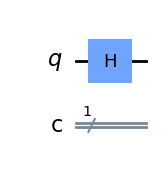

In [8]:
h_circuit = QuantumCircuit(1, 1)

#Adds a Hadamard Gate to the first qubit of the QuantumCircuit "h_circuit"
h_circuit.h(0)
h_circuit.draw('mpl')

<div class="alert alert-block alert-info">
    <b>Note:</b> The state above is called the $|+\rangle$ state, and is one of the Computational Basis States for single qubits. Computational Basis States form the foundation for more complex quantum states, are the basis for all quantum gates and algorithms, and hence represent the basic binary digits (0 and 1) in classical computing. For single qubits, the basis states are $|+\rangle$ and $|-\rangle$.

<div class="alert alert-block alert-info">
    <b>Note:</b> The .draw() Method is a Member Function of the QuantumCircuit Class that generates a Graphical Representation of a Quantum Circuit. This method creates a Visual Representation of the Qubits and Gates in a circuit, allowing users to see the State of the circuit at a given point in time. The .draw() method can also be used to display the circuit in various forms, including Text-Based ASCII Art, and more sophisticated visualizations using the Matplotlib Library (QuantumCircuit.draw('mpl')). The output of the .draw() method can be used to understand the Behavior of Quantum Circuits, Debug Quantum Algorithms, and gain insights into the Quantum Computing Process.
</div>

To visualize this better, we can use a <b>State Vector</b>! They provide an exact representation of the <b>quantum state of a circuit</b> in the form of a <b>complex-valued vector</b>, and are ideal for <b>small circuits</b> with <b>fewer qubits</b>.

The <b>Statevector() Function</b> outputs the <b>State Vector</b> of a <b>QuantumCircuit</b>. It takes the <b>QuantumCircuit</b> as an argument and outputs a state vector with complex-valued entries of the quantum states of the circuit:

In [9]:
print(Statevector(h_circuit))

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


### Probability Amplitudes

<b>Probabilities</b> are <b>numbers</b> that represent the <b>likelihood</b> of an <b>event occurring</b>. Mathematically, it's defined as the <b>ratio</b> of the number of <b>favorable outcomes</b> to the number of <b>possible outcomes</b> in a sample space. For example, if you roll a dice, the probability of getting a "6" is $\tfrac{1}{6}$ because there is only one favorable outcome (rolling a "6") out of the total number of possible outcomes (rolling any number from 1 to 6).

Probabilities are usually expressed as a <b>decimal</b> or a <b>percentage</b> and are <b>always between 0 and 1</b>. A probability of 0 means that an event is <b>impossible</b>, while a probability of 1 means that an event is <b>certain to occur</b>. Probabilities between 0 and 1 represent the <b>degree of uncertainty</b> about the occurrence of an event. For example, a probability of 0.5 means that the event is equally likely to occur or not to occur.

A <b>Probability Tree</b> is a <b>diagram</b> that shows all of the <b>possible outcomes</b> of an <b>event</b> and the <b>probability</b> of each outcome happening. It is used in decision making and risk analysis to visualize and calculate the probabilities of different scenarios and to make predictions about future events.

The tree starts with a <b>single node (the root)</b> that represents the <b>starting point</b> and <b>branches out</b> into <b>multiple nodes</b> that represent <b>different possible outcomes</b> and their <b>associated probabilities</b>.

Here's a probability tree of the H Gate:
<br/><br/>
<figure>
    <img src="probability_tree.png"/>
    <br/>
    <figcaption style="margin-left: 400px;">Credit: Qiskit Textbook (beta)</figcaption>
</figure>

What do you think the output will be if we apply the H Gate twice? <b>ANY GUESSES?</b>

The best way to figure this out would be to run this circuit on a quantum computer and see what the output would be. But it turns out that you don't really need a quantum computer to do this! For a circuit this simple, we can just simulate the output.

Simulating a quantum circuit means to <b>model the ideal behavior of a quantum system</b> on a <b>classical computer</b>. This is done by representing the quantum states and gates in a mathematical form and using algorithms to calculate the evolution of the quantum system over time. The goal of simulating a quantum circuit is to predict the outcome of quantum computations, to test and validate quantum algorithms, and to study the properties of quantum systems - <b>all without requiring a real quantum computer!</b>

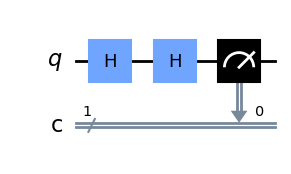

In [10]:
double_h_circuit = QuantumCircuit(1, 1)

# Adds two Hadamard Gates to the first qubit of the QuantumCircuit "double_h_circuit"
double_h_circuit.h(0)
double_h_circuit.h(0)

# "Measures" the quantum circuit by extracting the value in the qubit to the classical bit
double_h_circuit.measure(0, 0)

double_h_circuit.draw('mpl')

<div class="alert alert-block alert-info">
    <b>Note:</b> The .measure() Method takes the qubits to measure from as the first argument, and the classical bits to measure to as the second argument.
</div>

In [11]:
#Creates an instance of the qasm simulator
simulator = Aer.get_backend('qasm_simulator')

#Runs the simulator on the circuit and returns a job object that can be used to track the status 
#and results of the simulation
job = simulator.run(double_h_circuit)

#Retrieves the results of the simulation
result = job.result()

#Retrieves the final count of the quantum states
counts = result.get_counts()

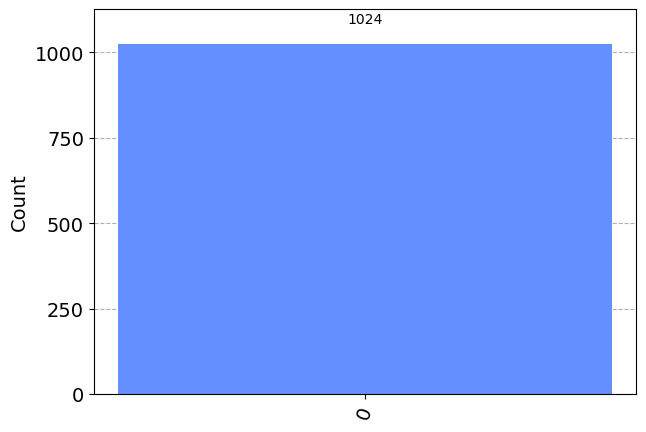

In [12]:
#Creates a histogram visualization of the quantum state counts, where the x-axis represents the quantum states 
#and the y-axis represents the corresponding count values
plot_histogram(counts)

What??? <b>THIS DOESN'T MAKE ANY SENSE!</b>

This doesn't align with our probability tree at all:
<br/><br/>
<figure>
    <img src="nonsense.png"/>
    <br/>
    <figcaption style="margin-left: 400px;">Credit: Qiskit Textbook (beta)</figcaption>
</figure>

It seems like two probabilistic gates are able to "undo" each other! One thing's for sure, we can't use regular probabilities to describe what's happening here. We need something else...

<b>ANY IDEAS ANYONE?</b>

The answer is <b>Probability Amplitudes!</b>

Probability amplitudes are mathematical quantities used in quantum mechanics that work exactly like classical probabilities, except that they not only represent <b>Amplitudes (Magnitude)</b>, but they also represent <b>Phase (Direction)</b>.

<div class="alert alert-block alert-info" style="background-color: #FFF0E9;">
    <b>Important Note:</b> The Uncertainty Principle is a fundamental concept in quantum physics that states that it is impossible to simultaneously know the state and phase of a qubit. The more precisely we know the state of a qubit, the less precisely we know the phase of it, and vice versa. This principle has important implications for quantum computing because it limits the amount of information that can be extracted from a qubit and places limitations on certain quantum algorithms. However, it also enables quantum computers to perform certain operations and solve problems that classical computers cannot.
</div>

<div class="alert alert-block alert-info">
    <b>Note:</b> Vectors have both a Magnitude and a Phase, while Scalars just have a Magnitude.
</div>

Now, we can answer the question of why the H Gate behaves this way! When two probability amplitudes add together, their phases <b>cancel each other out!</b> This effect is called <b>Interference</b>. Here is the updated probability tree explaining this phenomena:
<br/><br/>
<figure>
    <img src="interference.png"/>
    <br/>
    <figcaption style="margin-left: 400px;">Credit: Qiskit Textbook (beta)</figcaption>
</figure>

One final note before we move on, by taking the <b>Square</b> of the <b>Magnitude</b> of a Probability Amplitude, we can get the <b>Classical Probability</b> of that Probability Amplitude, <b>without the Phase!</b> This will be really useful later on, so just store it in the back of your minds for now!

A <b>Classical Probability</b> is represented by a <b>Real Number</b> between 0 to 1, but since <b>Probability Amplitudes</b> also have a direction, a natural candidate to represent them would be <b>Complex Numbers</b>. This means that we can now describe any probability amplitude as a number between -1 and +1, where the "-" sign indicates a phase of 180$^{\circ}$, and the "+" sign indicates a phase of 0$^{\circ}$:
<br/><br/>
<div style="display: flex; margin-left: 100px;">
  <figure style="margin-right: 20px;">
    <img style="height: 350px;" src="plus_phase.png"/>
      <figcaption style="margin-left: 20px;"><b style="margin-left: 160px;">+1</b><br/><br/>Credit: Qiskit Textbook (beta) - Amplitude Addition Widget</figcaption>
  </figure>
  <figure>
    <img style="height: 350px;" src="minus_phase.png"/>
      <figcaption style="margin-left: 20px;"><b style="margin-left: 160px;">-1</b><br/><br/>Credit: Qiskit Textbook (beta) - Amplitude Addition Widget</figcaption>
  </figure>
</div>

<div class="alert alert-block alert-info">
    <b>Note:</b> Here's a quick cheatsheet to translate phases to pi rotations (this will be useful later on):
    <ul>
        <li>$\pi = 180^{\circ}$</li>
        <li>$\pi/2 = 90^{\circ}$</li>
        <li>$\pi/4 = 45{\circ}$</li>
    </ul>
</div>

<div class="alert alert-block alert-info">
    <b>Note:</b> For now, we'll just be dealing with these two directions, so that we don't have to use complex numbers.
</div>

<b>ANY QUESTIONS?</b>

## State Vectors

So far, we've been using state vectors extensively to examine the quantum states of our circuits. Let's dive a bit deeper and see how we can represent and manipulate them mathematically:

$|x\rangle := {\sqrt{\tfrac{1}{2}}}\begin{bmatrix}1 \\ 1 \\ 0 \\ 0 \end{bmatrix} \longrightarrow |x\rangle := \begin{bmatrix}{\sqrt{\tfrac{1}{2}}} \\ {\sqrt{\tfrac{1}{2}}} \\ 0 \\ 0 \end{bmatrix}$

In this example, the symbol on the right is called a <b>Ket</b>. It's part of the <b>Dirac or Bra-Ket Notation</b>, and is used to represent state vectors in quantum mechanics. We have given this Ket the label of "x" - pronounced "ket x".

The next symbol is an equals sign with a colon before it. This is called an <b>Assignment Operator</b>, and is used to indicate an assignment of the value on the left to the value on the right.

After that, we have our probability amplitude $\sqrt{\tfrac{1}{2}}$, followed by our state vector representing all of the possible states for $\sqrt4 = 2$ Qubits. Notice how the first two states in the state vector have a value of $1$, while the other two states have a value of $0$. This is because the first two values are the only possible outcomes, with a Classical Probability that is $> 0$, while the other two values have a Classical Probability of $0$.

In the next step, when we multiply the <b>Probability Amplitude</b> with the values in the state vector, the $1$ values are replaced with the probability amplitude, while the $0$ values remain as they are.

To calculate the <b>Classical Amplitude</b> of a state in the state vector, as mentioned previously, we have to <b>Square</b> the value. As an example, $(\sqrt{\tfrac{1}{2}})^2$ is $\tfrac{1}{2}$.

If we do this for each probability amplitude in the state vector, we get:

$|x\rangle := \begin{bmatrix}\tfrac{1}{2} \\ \tfrac{1}{2} \\ 0 \\ 0 \end{bmatrix}$

Hence, the <b>Classical Amplitudes</b> for the states $00$ (first value in the state vector) and $01$ (second value in the state vector) are $\tfrac{1}{2}$. What this means is that the first qubit is in <b>Superposition!</b>

To verify whether a state vector is a valid state vector, <b>the squares of each of the probability amplitudes in the state vector should add up to $1$</b>. This is because you can't go higher than 1 in Classical Probability, since it doesn't make any sense!

<div class="alert alert-block alert-info">
    <b>Note:</b> Remember how we said that all quantum gates must be unitary? This is because we need to preserve the total probability of the state vector, so that everything adds up to 1 at the end!
</div>


## Transition Amplitude Matrices

Just like how we can use <b>State Vectors</b> to represent <b>Quantum States</b>, we can use <b>Transition Amplitude Matrices</b> to represent <b>Quantum Gates</b>.

To apply a transition amplitude matrix on a state vector, we <b>multiply them together</b> to get the resulting state vector:

$H = \begin{bmatrix}1 & 1 \\1 & -1 \\\end{bmatrix}$

$\begin{bmatrix}1 \\0 \end{bmatrix}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix} = \begin{bmatrix}1 \\1 \end{bmatrix}$

In this example, we're using the matrix of the H Gate. Each element in the matrix represents the <b>probability amplitude</b> of an <b>element</b> in the <b>input state vector</b> transforming to a number in the <b>output state vector</b>:

$\begin{bmatrix}00 -> 00 & 01 -> 00\\00 -> 01 & 01 -> 01 \\\end{bmatrix}$

The <b>size</b> of a <b>transition amplitude matrix</b> depends on the <b>number of quantum states</b> it is able to <b>transform</b>, which is denoted by this formula:

$(2^n)^2$

In the case of the Hadamard Gate, since it is a single qubit gate, it can represent $2^1 = 2$ quantum states. This means that the transition amplitude matrix will have $2^2 = 4$ elements, represented in a 2x2 matrix, which is exactly what we see!

<div class="alert alert-block alert-info">
    <b>Note:</b> Squaring the total result after adding up all of the probability amplitudes in the state vector will produce an incorrect result. Make sure to square each probability amplitude first before adding them all up!
</div>

<div class="alert alert-block alert-info">
    <b>Note:</b> The 4 states in this vector represent the Computational Basis States for two qubits. Namely - $|00\rangle$, $|01\rangle$, $|10\rangle$ and $|11\rangle$.
</div>

<b>ANY QUESTIONS?</b>

### X Gate

The <b>X Gate</b> is a <b>quantum gate</b> that <b>flips the state of a qubit</b>. It is represented by the matrix:

$X = \begin{bmatrix}0 & 1 \\1 & 0 \\\end{bmatrix}$

The <b>.x() Method</b> applies the <b>X Gate</b> to a <b>Qubit</b> in a <b>QuantumCircuit</b>. This method takes the <b>Qubit Index</b> as an argument and updates the state of the qubit by flipping its state:

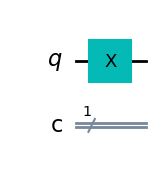

In [13]:
x_circuit = QuantumCircuit(1, 1)

#Adds an X Gate to the first qubit of the QuantumCircuit "x_circuit"
x_circuit.x(0)
x_circuit.draw('mpl')

In [14]:
print(Statevector(x_circuit))

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


### Z Gate

The <b>Z Gate</b> is a <b>quantum gate</b> that <b>changes the phase of a qubit's state by $\boldsymbol \pi$</b> if the state is $|1\rangle$. The Z Gate is represented by the matrix:

$Z = \begin{bmatrix}1 & 0 \\0 & -1 \\\end{bmatrix}$

The <b>.z() Method</b> applies the <b>Z Gate</b> to a <b>Qubit</b> in a <b>QuantumCircuit</b>. This method takes the <b>Qubit Index</b> as an argument and updates the state of the qubit by applying the Z transformation to it:

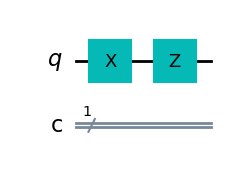

In [19]:
z_circuit = QuantumCircuit(1, 1)

#Adds an X Gate, followed by a Z Gate to the first qubit of the QuantumCircuit "z_circuit"
z_circuit.x(0)
z_circuit.z(0)
z_circuit.draw('mpl')

In [20]:
print(Statevector(z_circuit))

Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


<div class="alert alert-block alert-info">
    <b>Note:</b> As we saw in the probability tree for the hadamard gate, phase flipping only really works when the qubit is in the state $|1\rangle$. This is because a $\pi$ rotation on the state $|1\rangle$ transforms it to the state $|{-1}\rangle$, while the same rotation on the state $|0\rangle$ transforms it to the state $|{-0}\rangle$, which is still $|0\rangle$.</div>

### I Gate

The <b>I Gate</b> is the <b>Identity Gate</b> - a <b>quantum gate</b> that takes a <b>single qubit</b> as <b>input</b> and returns the same qubit <b>unchanged</b>. The I gate is represented by the identity matrix:

$I = \begin{bmatrix}1 & 0 \\0 & 1 \\\end{bmatrix}$

The <b>I Gate</b> does not change the state of a qubit and is often used as a <b>placeholder</b> in <b>QuantumCircuits</b>. Despite being a seemingly useless gate, the I gate is a <b>fundamental building block</b> for many <b>quantum algorithms</b> and is used <b>in combination</b> with <b>other gates</b> to create <b>more complex quantum circuits</b>.

The <b>.i() Method</b> applies the <b>Identity Gate</b> to a <b>Qubit</b> in a <b>QuantumCircuit</b>. This method takes the <b>Qubit Index</b> as an argument and updates the state of the qubit by applying the identity transformation to it:

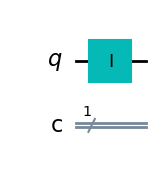

In [21]:
i_circuit = QuantumCircuit(1, 1)

#Adds an I Gate to the first qubit of the QuantumCircuit "i_circuit"
i_circuit.i(0)
i_circuit.draw('mpl')

In [22]:
print(Statevector(i_circuit))

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


### S Gate

The <b>S Gate</b> is a <b>Phase Gate</b> that is equivalent to the <b>P Gate</b> with a <b>Phase Value</b> of $\bf \pi/2$. The <b>S Gate</b> is represented by the matrix:

$S = \begin{bmatrix}1 & 0 \\0 & e^\frac{i\pi}2 \\\end{bmatrix}$

The <b>.s() Method</b> applies the <b>S Gate</b> to a <b>Qubit</b> in a <b>Quantum Circuit</b>. The method takes the <b>Qubit Index</b> as an argument and updates the state of the qubit by applying the S Gate to it:

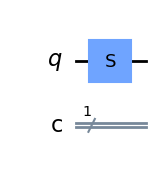

In [29]:
s_circuit = QuantumCircuit(1, 1)

#Adds an S Gate to the first qubit of the QuantumCircuit "s_circuit"
s_circuit.s(0)
s_circuit.draw('mpl')

In [30]:
print(Statevector(s_circuit))

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


### T Gate

The <b>T Gate</b> is a <b>Phase Gate</b> that is equivalent to the <b>P Gate</b> with a <b>Phase Value</b> of $\bf \pi/4$. The <b>T Gate</b> is represented by the matrix:

$S = \begin{bmatrix}1 & 0 \\0 & e^\frac{i\pi}4 \\\end{bmatrix}$

The <b>.t() Method</b> applies the <b>T Gate</b> to a <b>Qubit</b> in a <b>Quantum Circuit</b>. The method takes the <b>Qubit Index</b> as an argument and updates the state of the qubit by applying the T Gate to it:

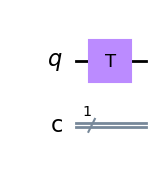

In [43]:
t_circuit = QuantumCircuit(1, 1)

#Adds a T Gate to the first qubit of the QuantumCircuit "t_circuit"
t_circuit.t(0)
t_circuit.draw('mpl')

In [44]:
print(Statevector(t_circuit))

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


<div class="alert alert-block alert-info">
    <b>Note:</b> The main similarity between the S Gate and the T Gate is that they both add a specific phase to the state of a qubit. The T-gate adds a phase of $\pi$/4 to the state of a qubit, while the S-gate adds a phase of $\pi$/2.
</div>

### U Gate

The <b>U Gate</b> is a <b>General Unitary Gate</b> and can implement <b>any unitary transformation</b>, making it one of the most <b>versatile gates</b> available in <b>Quantum Computing</b>. The <b>U Gate</b> is represented by the matrix:

$U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\ e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})\end{bmatrix}$

PS: The exact form of the unitary transformation depends on the parameters provided.

The <b>.u() Method</b> applies a <b>U Gate</b> to a <b>Qubit</b> in a <b>QuantumCircuit</b>. The method takes a <b>list of parameters</b> defining the <b>Unitary Transformation</b>, the <b>Qubit Index</b> and a <b>Label (optional)</b> as arguments and updates the state of the qubit by applying the U Gate to it:

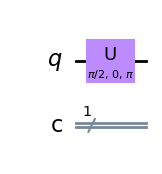

In [45]:
u_circuit = QuantumCircuit(1, 1)

#Adds a U Gate to the first qubit of the QuantumCircuit "u_circuit"
u_circuit.u(pi/2, 0, pi, 0)
u_circuit.draw('mpl')

In [46]:
print(Statevector(u_circuit))

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [47]:
u_circuit.measure(0, 0)

<b>CAN YOU GUESS WHAT GATE THIS IS?</b>

In [48]:
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(u_circuit)
result = job.result()
counts = result.get_counts()

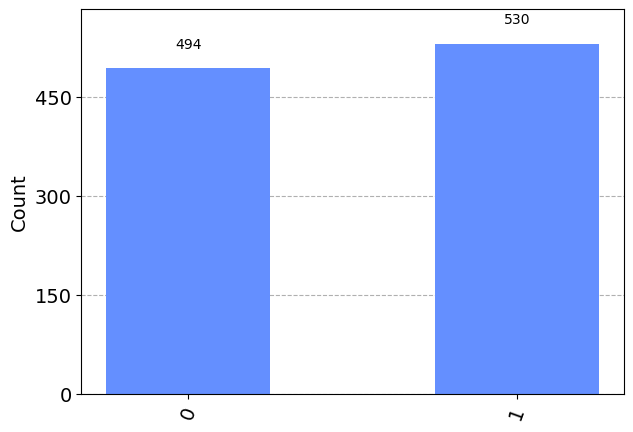

In [49]:
plot_histogram(counts)

<b>ANY QUESTIONS?</b>

## Multi Qubit Gates

### Controlled-NOT (CNOT) Gate

The <b>CNOT (Controlled NOT) Gate</b> is a <b>Two-Qubit Quantum Gate</b> that performs an <b>X Gate on the Target Qubit, conditioned on the state of the Control Qubit</b>. In other words, if the control qubit is in the state |1⟩, the target qubit will be flipped (from |0⟩ to |1⟩ or from |1⟩ to |0⟩), and if the control qubit is in the state |0⟩, the target qubit remains unchanged.

The <b>CNOT Gate</b> is represented by the matrix:

$CNOT = \begin{bmatrix}1 & 0 & 0 & 0 \\0 & 1 & 0 & 0\\0 & 0 & 0 & 1\\0 & 0 & 1 & 0\end{bmatrix}$

The <b>.cx() Method</b> is a method used to apply a <b>Controlled NOT (CNOT) Gate</b> to <b>Two Qubits</b> in a Quantum Circuit. The method takes two arguments, the <b>Control Qubit</b> and the <b>Target Qubit</b>, and updates the state of the target qubit:

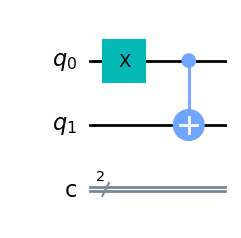

In [74]:
cx_circuit = QuantumCircuit(2, 2)

#Performs an X Gate on the second qubit of the QuantumCircuit "cx_circuit"
cx_circuit.x(0)
cx_circuit.cx(0, 1)
cx_circuit.draw('mpl')

In [75]:
print(Statevector(cx_circuit))

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


### Controlled-Z (CZ) Gate

The <b>CZ (Controlled Z) Gate</b> is a <b>Two-Qubit Quantum Gate</b> that performs a <b>Phase Flip</b> on the <b>Target Qubit</b>, conditioned on the state of the <b>Control Qubit</b>. In other words, if the control qubit is in the state |1⟩, the target qubit's phase will be flipped, and if the control qubit is in the state |0⟩, the target qubit remains unchanged.

The <b>CZ Gate</b> is represented by the matrix:

$CZ = \begin{bmatrix}1 & 0 & 0 & 0 \\0 & 1 & 0 & 0\\0 & 0 & 0 & 1\\0 & 0 & 0 & -1\end{bmatrix}$

The <b>.cz() Method</b> is used to apply a <b>Controlled-Z (CZ) Gate</b> to <b>Two Qubits</b> in a QuantumCircuit. The method takes two arguments, the <b>Control Qubit</b> and the <b>Target Qubit</b>, and updates the state of the target qubit:

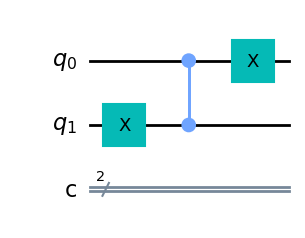

In [64]:
cz_circuit = QuantumCircuit(2, 2)

#Performs a Z Gate on the second qubit of the QuantumCircuit "cz_circuit"
cz_circuit.x(1)
cz_circuit.cz(0, 1)
cz_circuit.x(0)
cz_circuit.draw('mpl')

In [63]:
print(Statevector(cz_circuit))

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


### Toffoli Gate

The <b>Toffoli (CCNOT) Gate</b> is a <b>Three-Qubit Quantum Gate</b> that acts as a <b>CNOT Gate</b> on the <b>Target Qubit</b>, with the control qubits being the <b>first two qubits</b>. If both of the control qubits are in the state $|1\rangle$, the target qubit will be flipped (from $|0\rangle$ to $|1\rangle$ or from $|1\rangle$ to $|0\rangle$), otherwise the target qubit remains unchanged.

The <b>CCNOT Gate</b> is represented by the matrix:

$CCNOT = \begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\end{bmatrix}$

The <b>.ccx() Method</b> is used to apply a <b>Toffoli Gate</b> to <b>Three Qubits</b> in a QuantumCircuit. The method takes three arguments, <b>the first Control Qubit</b>, <b>the second Control Qubit</b>, and the <b>Target Qubit</b>, and updates the state of the target qubit:

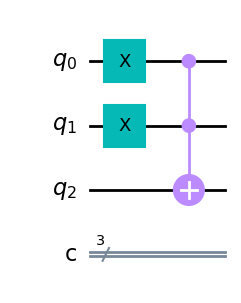

In [68]:
ccx_circuit = QuantumCircuit(3, 3)

#Performs an X Gate on the third qubit of the QuantumCircuit "ccx_circuit"
ccx_circuit.x(0)
ccx_circuit.x(1)
ccx_circuit.ccx(0, 1, 2)
ccx_circuit.draw('mpl')

In [69]:
print(Statevector(ccx_circuit))

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             1.+0.j],
            dims=(2, 2, 2))


<b>ANY QUESTIONS?</b>

# Creating A Half-Adder Quantum Circuit ⚡️

<img src="half_adder_circuit.png" width="300" height="300"/>

<table>
  <thead>
    <tr>
      <th>A</th>
      <th>B</th>
      <th>Carry</th>
      <th>Sum</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

A <b>Half Adder</b> is a <b>basic digital circuit</b> used to perform <b>Binary Addition</b> of <b>two single-bit binary numbers</b>. It can be modified to <b>add any set of numbers of any size</b>, and is used in one of your processor's core components - the <b>ALU (Arithmetic Logic Unit)</b>.

It has two inputs, called <b>"A"</b> and <b>"B"</b>, and two outputs, called <b>"Sum"</b> and <b>"Carry"</b>. The sum output gives the result of the addition of the two inputs, while the carry output indicates if there is a carry from one bit position to another during the addition.

Here's your challenge: try creating a <b>Quantum Adder Circuit</b> using the gates that we've learnt so far!

In [ ]:
####### YOUR CODE HERE #######
# 1. Create a QuantumCircuit called "half_adder" with the right amount of quantum and classical bits.

# 2. Encode all four possible inputs to the adder circuit.

# 3. When the inputs are different, the Sum output should be 1.

# 4. When the inputs are the same, the Sum output should be 0.

# 5. When the inputs are both 1, the Carry output should be 1.

# 6. Measure the result from the qubits to the classical bits.
####### YOUR CODE HERE #######

<div class="alert alert-block alert-info">
    <b>Note:</b> Encoding is the process of converting information from one format or representation to another. In our case, we're encoding the four possible input states to make them suitable for processing on a Quantum Computer. 
</div>

## Solution 💡

In [80]:
half_adder = QuantumCircuit(4, 2)

# Then, our circuit should encode an input
# (here '00') (DEFAULT)

# (here '01')
half_adder.x(1)

#(here '10')
#half_adder.x(0)

# (here '11')
#half_adder.x(0)
#half_adder.x(1)

# Next, it should carry out the adder circuit we created
half_adder.cx(0,2)
half_adder.cx(1,2)
half_adder.ccx(0,1,3)

# Finally, we will "measure" the values of the bottom two qubits by extracting their values to the two classical bits
half_adder.measure([2, 3], [0, 1])

## Drawing The Quantum Circuit ✍️

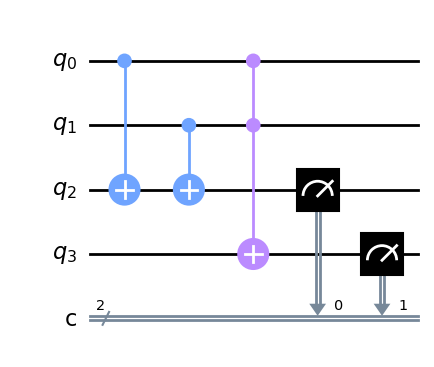

In [77]:
half_adder.draw(output='mpl')

## Simulating A Quantum Circuit 💻

In [81]:
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(half_adder)
result = job.result()
counts = result.get_counts()

<div class="alert alert-block alert-info">
    <b>Note:</b> Keep in mind that the "qasm_simulator" isn't the only simulator available in Qiskit. Here are a few more that you could also use:
    <ol>
        <li>The State Vector Simulator (.get_statevector()) provides an exact representation of the quantum state of a circuit in the form of a complex-valued vector, and is ideal for small circuits with few qubits.</li>
        <li>The Unitary Simulator (.get_unitary()) provides the unitary matrix representation of a quantum circuit, which can be useful for analyzing the properties of quantum gates and circuits.</li>
        <li>The IBMQ Simulator is a QASM Simulator that uses the IBM Quantum Experience to simulate quantum circuits. It provides a cloud-based simulation environment that can handle larger circuits and provides access to real quantum hardware for testing.</li>
    </ol>
</div>

<div class="alert alert-block alert-info">
    <b>Note:</b> In the future, it may not be useful to simulate a quantum computer on a classical computer anymore. Here are a couple of reasons for this:
    <ol>
        <li>Simulating a quantum computer on a classical computer becomes increasingly difficult as the number of qubits (the quantum equivalent of classical bits) increases. The complexity of simulating a quantum computer scales exponentially with the number of qubits, making it impractical for large-scale quantum computers.</li>
        <li>Classical computers have limited resources compared to quantum computers, such as memory and processing power. As quantum computers continue to advance, it may become increasingly difficult for classical computers to keep up with the computational demands of simulating a quantum system.</li>
        <li>The algorithms used for simulating quantum computers on classical computers may not be efficient enough to accurately represent the behavior of a real quantum computer. This could lead to discrepancies in the simulation results and a less accurate representation of the quantum system.</li>
        <li>Entanglement, a concept that we'll touch on in more detail later, allows for certain quantum gates to be performed faster than classical gates. Entangled qubits are highly correlated, and their states cannot be described independently. This means that simulating the behavior of entangled qubits on a classical computer can be extremely challenging, as it requires modeling complex and highly correlated quantum states. As quantum computers become larger and more entangled, it may become increasingly difficult to accurately simulate their behavior on classical computers.</li>
    </ol>
</div>

## Plotting The Results Of A Quantum Circuit 📊

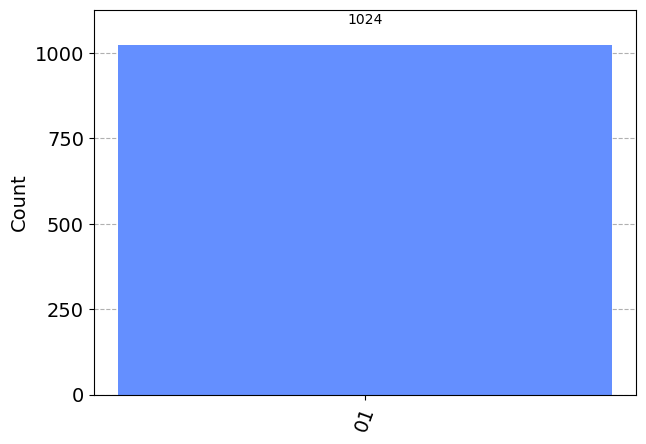

In [82]:
plot_histogram(counts)

<div class="alert alert-block alert-info">
    <b>Note:</b> Keep in mind that "circuit.draw" and "plot_histogram()" aren't the only visualization methods available in Qiskit. Here are a few more that you could also use:
    <ol>
        <li>The Bloch Sphere Plotter (plot_bloch_multivector()) is a tool that allows you to visualize the bloch sphere of a quantum circuit.</li>
        <li>The State Vector City Plotter (plot_state_city()) is a tool that allows you to visualize the state vector of a quantum circuit using a graphical representation.</li>
        <li>The Matrix Plotter (plot_state_matrix()) is a tool that allows you to visualize the unitary matrix of a quantum circuit, and can be used to see the effect of each quantum gate on the state of the circuit.</li>
    </ol>
</div>

## Run A Quantum Circuit On A Quantum Computer ⚛️ 🧮

Now, let's run the quantum circuit on a <b>real quantum computer</b>!

However, it's important to note that while running the circuit on a quantum computer would still produce accurate results, the simulation results may differ from a real quantum computer due to <b>limitations in error correction</b> and <b>higher levels of noise</b>.

Running on ibmq_belem
Job Status: job has successfully run


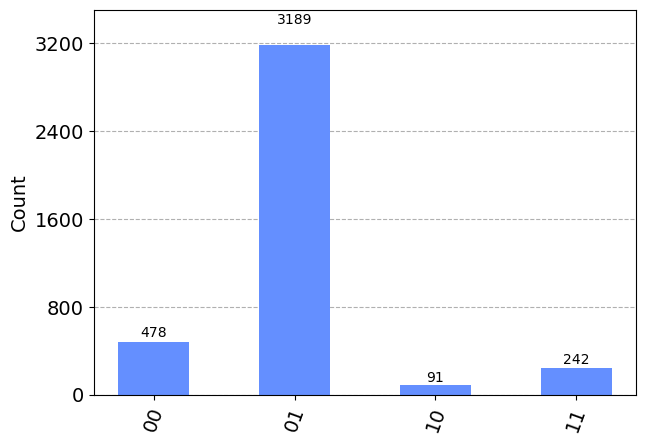

In [83]:
# 1. Ask IBM Quantum for its least busy device that isn't a simulator
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
IBMQ.save_account("85421fbe1415a86b806cbca550e54c124b4442e2b85e71620edbe6c0872aa9a1aa6699ba27cbcaf71528dfda654ae01ea88404e57bc0e4b8acd9c46e81b18c82", overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters = lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

# 2. Convert the program to a form the device can run
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_qc = transpile(half_adder, device)

# 3. Send the program off to IBM Quantum to run on a real device
#    and monitor its status
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

# 4. Plot the results as a histogram
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())

<b>ANY QUESTIONS?</b>

<b>Product State Vectors</b> are made up of <b>individual state vectors</b>, each representing the <b>quantum states of a qubit, multiplied together</b>:

$|+\rangle = \begin{bmatrix}1 \\ 1\end{bmatrix}$

$|0\rangle = \begin{bmatrix}1 \\ 0\end{bmatrix}$

$|{+0}\rangle = \begin{bmatrix}1 \\ 0 \\ 1 \\ 0\end{bmatrix}$

Looking at this state vector closer, it is the <b>equal superposition</b> of <b>two two-qubit state vectors</b>:

$|00\rangle = \begin{bmatrix}1 \\ 0 \\ 0 \\ 0\end{bmatrix}$

$|10\rangle = \begin{bmatrix}0 \\ 0 \\ 1 \\ 0\end{bmatrix}$

$\tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$

<div class="alert alert-block alert-info">
    <b>Note:</b> The probability amplitude is distributed over the two state vectors <i>after</i> adding them together!
</div>

<div class="alert alert-block alert-info">
    <b>Note:</b> The "+" sign is used here to indicate that there is an equal superposition between the two states.
</div>

Out of all of the possible product state vectors you could make using two single qubit state vectors, there are four combinations that cannot be represented by <b>any possible product state vector</b>! These four state vectors are called the <b>Bell States</b>:

$|{\phi^+}\rangle = \begin{bmatrix}1 \\ 0 \\ 0 \\ 1\end{bmatrix}, \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

$|{\phi^-}\rangle = \begin{bmatrix}1 \\ 0 \\ 0 \\ -1\end{bmatrix}, \tfrac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

$|{\psi^+}\rangle = \begin{bmatrix}0 \\ 1 \\ 1 \\ 0\end{bmatrix}, \tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

$|{\psi^-}\rangle = \begin{bmatrix}0 \\ 1 \\ -1 \\ 0\end{bmatrix}, \tfrac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

And again, <b>THIS DOESN'T MAKE ANY SENSE</b>! At least, until we start to consider what these state vectors actually mean.

All of the bell states are <b>Entangled States</b>, meaning that the first qubit is able to control the second qubit. In fact, they're so highly entangled that it's <b>impossible to represent them separately!</b>

Now you may be wondering, <b>if entanglement can't be made using product vectors, how do we create them in a quantum circuit?</b> The answer lies in the use of the <b>CNOT Gate</b>!

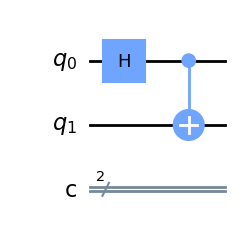

In [84]:
phi_plus = QuantumCircuit(2, 2)

phi_plus.h(0)
phi_plus.cx(0, 1)
phi_plus.draw('mpl')

In [85]:
print(Statevector(phi_plus))

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


This circuit represents the $\boldsymbol{\phi^+}$ <b>state</b>.

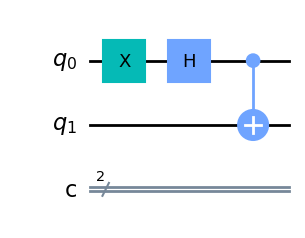

In [86]:
phi_minus = QuantumCircuit(2, 2)

phi_minus.x(0)
phi_minus.h(0)
phi_minus.cx(0, 1)
phi_minus.draw('mpl')

In [87]:
print(Statevector(phi_minus))

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


This circuit represents the $\boldsymbol{\phi^-}$ <b>state</b>.

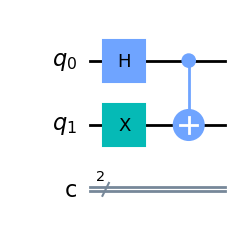

In [88]:
psi_plus = QuantumCircuit(2, 2)

psi_plus.h(0)
psi_plus.x(1)
psi_plus.cx(0, 1)
psi_plus.draw('mpl')

In [ ]:
print(Statevector(psi_plus))

This circuit represents the $\boldsymbol{\psi^+}$ <b>state</b>.

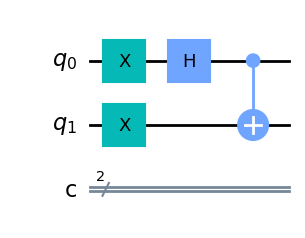

In [89]:
psi_minus = QuantumCircuit(2, 2)

psi_minus.x(0)
psi_minus.h(0)
psi_minus.x(1)
psi_minus.cx(0, 1)
psi_minus.draw('mpl')

In [90]:
print(Statevector(psi_minus))

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


This circuit represents the $\boldsymbol{\psi^-}$ <b>state</b>.

Why is entanglement such an important aspect of quantum computing, and how can we use it to achieve quantum advantage?

Because state vectors grow exponentially with the number of qubits, it becomes really hard to simulate them on a classical computer. It turns out that there's a cool mathematical <b>trick</b> we can use to simulate entangled qubits in a much easier way!

Instead of simulating <b>both qubits together</b>, what if we simulate <b>each qubit separately</b>, and then join the results together? This would require us to do <b>two single qubit computations</b> for each entangled pair, which means simulating $\textbf 2n$ <b>probability amplitudes</b> instead of the usual $\textbf 2^n$ <b>probability amplitudes</b>:

$\phi^+ = \begin{bmatrix}1 \\ 0 \\ 0 \\ 1\end{bmatrix} \longrightarrow \phi^- = \begin{bmatrix}1 \\ 0 \\ 0 \\ -1\end{bmatrix}$

$\therefore 2^n \: probability \: amplitudes$

<hr style="height: 1px; background-color: #333;"/>

$\phi_A^+ = \begin{bmatrix}1 \\ 0\end{bmatrix} \longrightarrow \begin{bmatrix}1 \\ 0\end{bmatrix}$

$\phi_B^+ = \begin{bmatrix}0 \\ 1\end{bmatrix} \longrightarrow \begin{bmatrix}0 \\ -1\end{bmatrix}$

$\phi^- = \begin{bmatrix}1 \\ 0 \\ 0 \\ -1\end{bmatrix}$

$\therefore 2n \: probability \: amplitudes$

However, there's a catch. This is only possible with <b>single-qubit gates</b>, because we don't need the full description of the product state vector. For <b>multi-qubit gates</b>, this technique <b>doesn't work</b>!

This isn't necessarily a bad thing though. In fact, it's a very good thing, because if classical computers were able to do the same things as quantum computers, <b>how would we achieve Quantum Advantage?</b>

<b>Shor's Algorithm</b>, for example, is an algorithm that can <b>factorize integers</b> in <b>linear time</b> using quantum mechanical properties - namely <b>superposition</b> and <b>entanglement</b>. Current banking systems are "banking" (pun intended) on the fact that it's impossible to factorize large integers in a reasonable amount of time, but once the technology is good enough, there is going to be an entirely new paradigm shift towards <b>quantum encryption algorithms</b>.

Hence, quantum algorithms <b>NEED</b> to be able to do things that classical computers can't simulate. This can be done by <b>manipulating qubits in complex ways</b>, and ensuring that <b>the full $\textbf 2^n$ amplitude description is needed for a quantum algorithm to run</b>.

<div class="alert alert-block alert-info">
    <b>Note:</b> Shor's algorithm can technically be simulated on a classical computer. However, it requires a very large amount of computational resources and is considered infeasible for large input values.
</div>

<b>TO SUMMARIZE:</b>
<ul>
    <li>We revised scalars, vectors and matrices, and the differences between them.</li>
    <li>We learned about Qiskit, a framework made by IBM to program quantum computers in Python.</li>
    <li>We implemented various single-qubit and multi-qubit quantum gates, like the H Gate, Z Gate, X Gate, CNOT Gate, Toffoli Gate, and so many more.</li>
    <li>We learned about product states, and how the bell states cannot be represented using individual single-qubit state vectors.</li>
    <li>We learned about so many fundamental computing concepts on the way, created a half adder circuit, and (hopefully) had a ton of fun :)</li>
</ul>

<b>THANK YOU!</b>